In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd 


In [2]:
def exp(x,a,b,c):
    return np.exp(-x/b)*a+c
def frontselect(lista, fronte=0):
    result = []
    for i in lista:
        if i[2]==fronte:
            result.append(i)
    return result
def convtime(x, a=1.041, b= 130):
    return a*x+b
def fromhist(x):
    l = len(x)
    xnew = []
    for i in range(l-1):
        xnew.append((x[i]+x[i+1])/2)
    return xnew

0 leading
1 trailing

In [3]:
df = pd.DataFrame(columns= ["Canale 0","Canale 3","Canale 4","Canale 6","Canale 8" ])
fname = r"C:\Users\Lorenzo\Desktop\lab 5\acquisizione dati 3\prima presa dati.txt"
file = open(fname, "r")
n = 0
q = 0
col = 0
car = 0
locdict = {}
events = []
for f in file: 
    #print(f)
    #print(df)
    if q ==4:#parte di programma che mette il dizionario nella lista
        k = locdict.keys()
        for h in k:
            lista = locdict[h]
            lista_int= [int(y) for y in lista]
            events.append(lista_int)
        #for nr in k: ci ho un po' provato a mettere nel dataframe, senza successo. Per ora ci basta pensare alla lista
            
           # try:
           #     print("GOING")
           #     print(locdict[nr])
           #     print(df)
           #     df.loc[len(df), "event"+str(nr)] = locdict[nr]
           # except KeyError:
           #     print("AIUTO")
           #     cose = [np.nan for i in range(len(df.index))]
           #     toadd = cose+locdict[nr]
           #     title = "event "+str(nr)
           #     df[title] = toadd
                
        locdict = {}
        q = 0
        col =0
    for i in range(len(f)):
        #print(locdict)
        #print("f_i="+str(f[i]))
        #print("col="+str(col))
        #print("car="+str(car))
        #print("q"+str(q))
        if f[i] == "\n":
            q+=1
            col = 0
            car = 0            
            n+=1
            break
        elif f[i] == "\t":
            col += 1
            car =0 
        else:
            if car ==0 and q == 0:
                locdict[col]=[f[i]]
                car= 1
            elif car ==0:
                locdict[col].append(f[i])
                car +=1
            else:
                #print(locdict)
                locdict[col][q]+=f[i]
                car+=1
                
                
            

file.close()


In [60]:
print(n)

2204393


In [4]:

dict_tot= {}
for ev in events:
    ev[3]= convtime(ev[3])
    if ev[1] not in dict_tot.keys():
        dict_tot[ev[1]]= [ev]
    else:
        dict_tot[ev[1]].append(ev)

## Legenda per i vari canali
* 0 Up
* 3 CsI
* 4 Down
* 6 Coincidenza (110)
* 8 Coincidenza (01X)

## Scintillatore up

leading


In [5]:
times_all=[]
for i in dict_tot.keys():
    for j in dict_tot[i]:
        times_all.append(j[3])

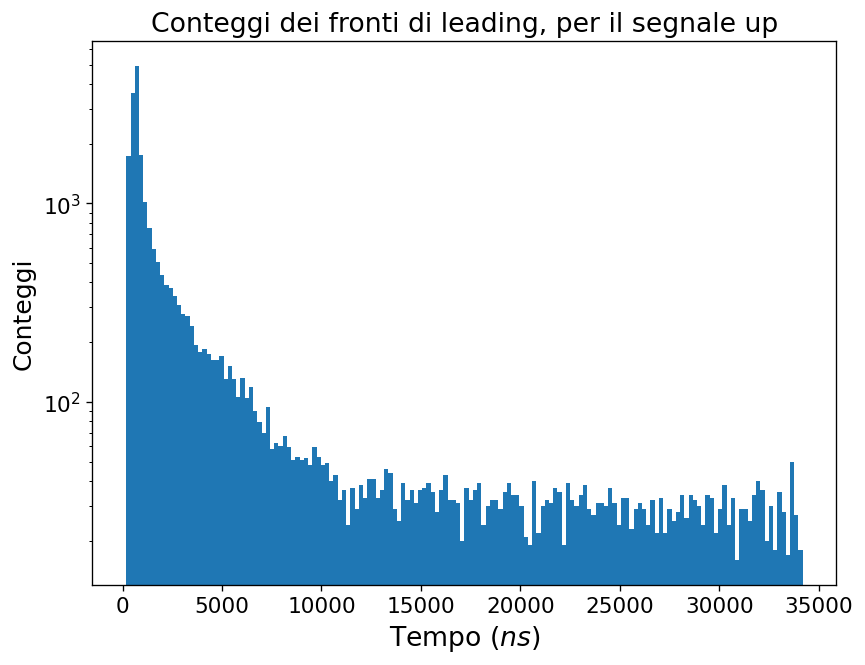

In [15]:
plt.figure(figsize=(8,6), dpi = 120)
plt.yscale("log")
plt.xlabel("Tempo ($ns$)", fontsize = 16)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
up_0 = frontselect(dict_tot[0],0)
up0_t = [i[3] for i in up_0]
plt.title("Conteggi dei fronti di leading, per il segnale up", fontsize = 16)
yup0,xup0, oup0 = plt.hist(up0_t, bins =160)
xup0_adapt = fromhist(xup0)
valup, covup = curve_fit(exp, xup0_adapt[2:],yup0[2:], (5000,3000,100),[np.sqrt(i) for i in yup0[2:]])
#plt.plot(xup0_adapt, [exp(i, valup[0], valup[1], valup[2]) for i in xup0_adapt])


In [7]:
sum (yup0)

24234.0

[2]
717.5794375


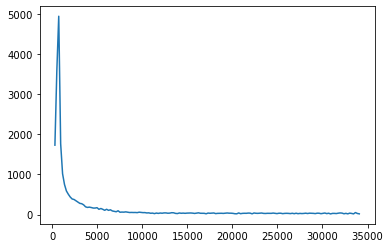

In [8]:
plt.plot(xup0_adapt, yup0)
m = max(yup0)
print(np.where(yup0 == m)[0])
print(xup0_adapt[2])

In [9]:
sorry i me

33.64721001697349

In [25]:
lim = 10000
yup0_sel =[]
for i in up0_t:
    if i<lim:
        yup0_sel.append(i)

Text(0.5, 1.0, 'Occorrenze del fronte trailing, per il segnale up (<10000 ns)')

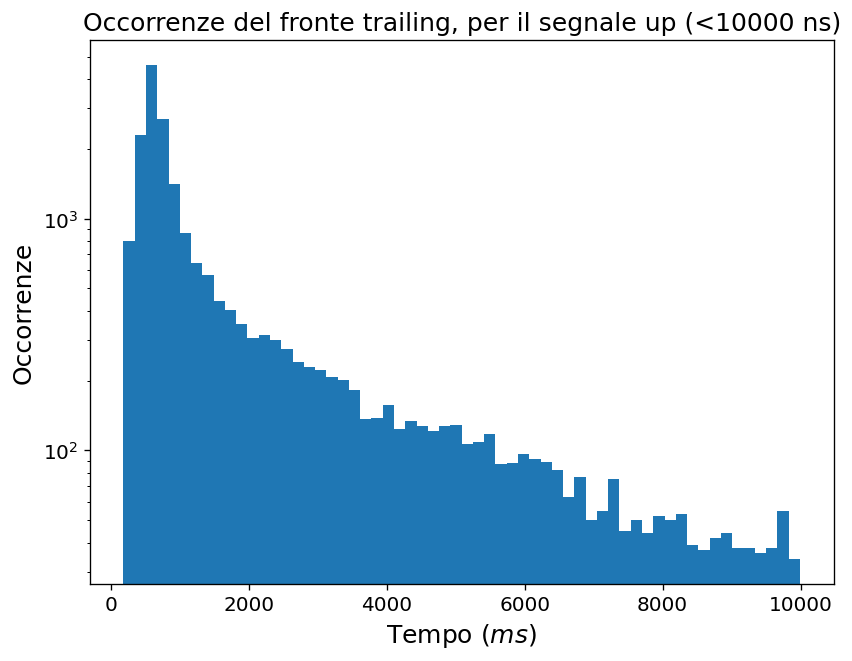

In [26]:
plt.figure(figsize=(8,6), dpi = 120)
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yscale("log")
plt.yticks(fontsize = 12)
yselup0, xselup0, qqqqq = plt.hist(yup0_sel, bins = 60)
plt.title("Conteggi del fronte leading, per il segnale up (<"+str(lim)+" ns)", fontsize = 15)


In [12]:
sum(yselup0)/sum(yup0)

0.8512833209540315

trailing


In [27]:
times_all=[]
for i in dict_tot.keys():
    for j in dict_tot[i]:
        times_all.append(j[3])

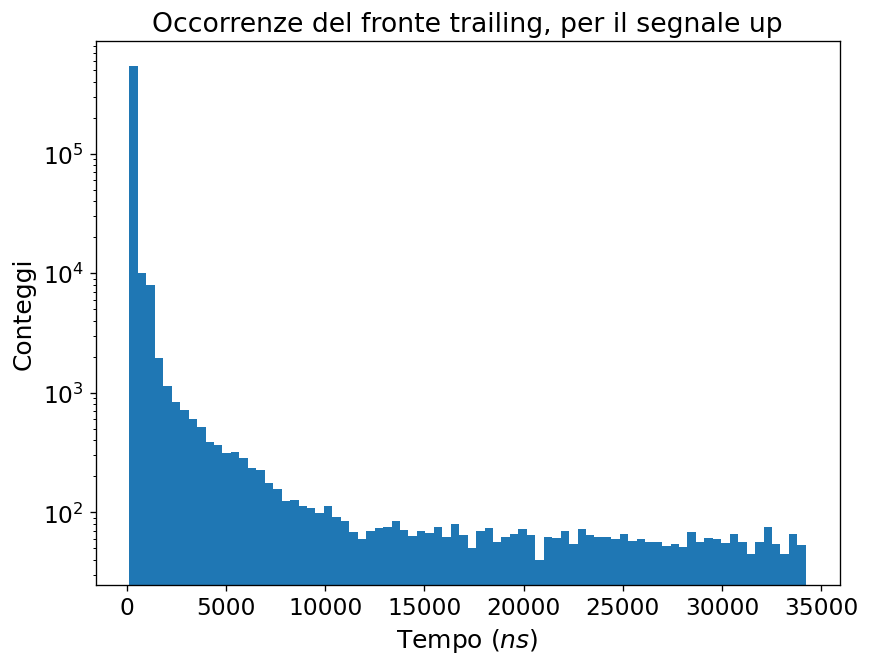

In [31]:
plt.figure(figsize=(8,6), dpi = 120)
plt.yscale("log")
plt.xlabel("Tempo ($ns$)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
up_1 = frontselect(dict_tot[0],1)
up1_t = [i[3] for i in up_1]
plt.title("Conteggi del fronte trailing, per il segnale up", fontsize = 16)
yup1,xup1, oup1 = plt.hist(up1_t, bins =80)


In [33]:
lim = 600
yup1_sel =[]
for i in up1_t:
    if i<lim:
        yup1_sel.append(i)

Text(0.5, 1.0, 'Occorrenze del fronte trailing, per il segnale up (<600 ms)')

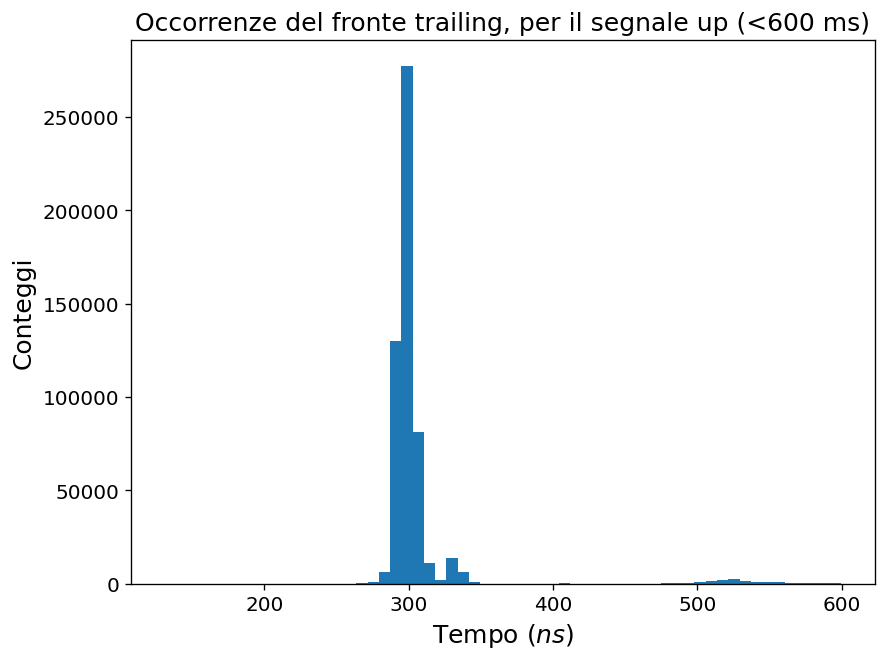

In [34]:
plt.figure(figsize=(8,6), dpi = 120)
plt.xlabel("Tempo ($ns$)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
yselup1, xselup1, qqqqq1 = plt.hist(yup1_sel, bins = 60)
plt.title("Conteggi del fronte trailing, per il segnale up (<"+str(lim)+" ms)", fontsize = 15)


In [15]:
sum(yselup1)/sum(yup1)

0.9512747549352946

## Analisi CSI


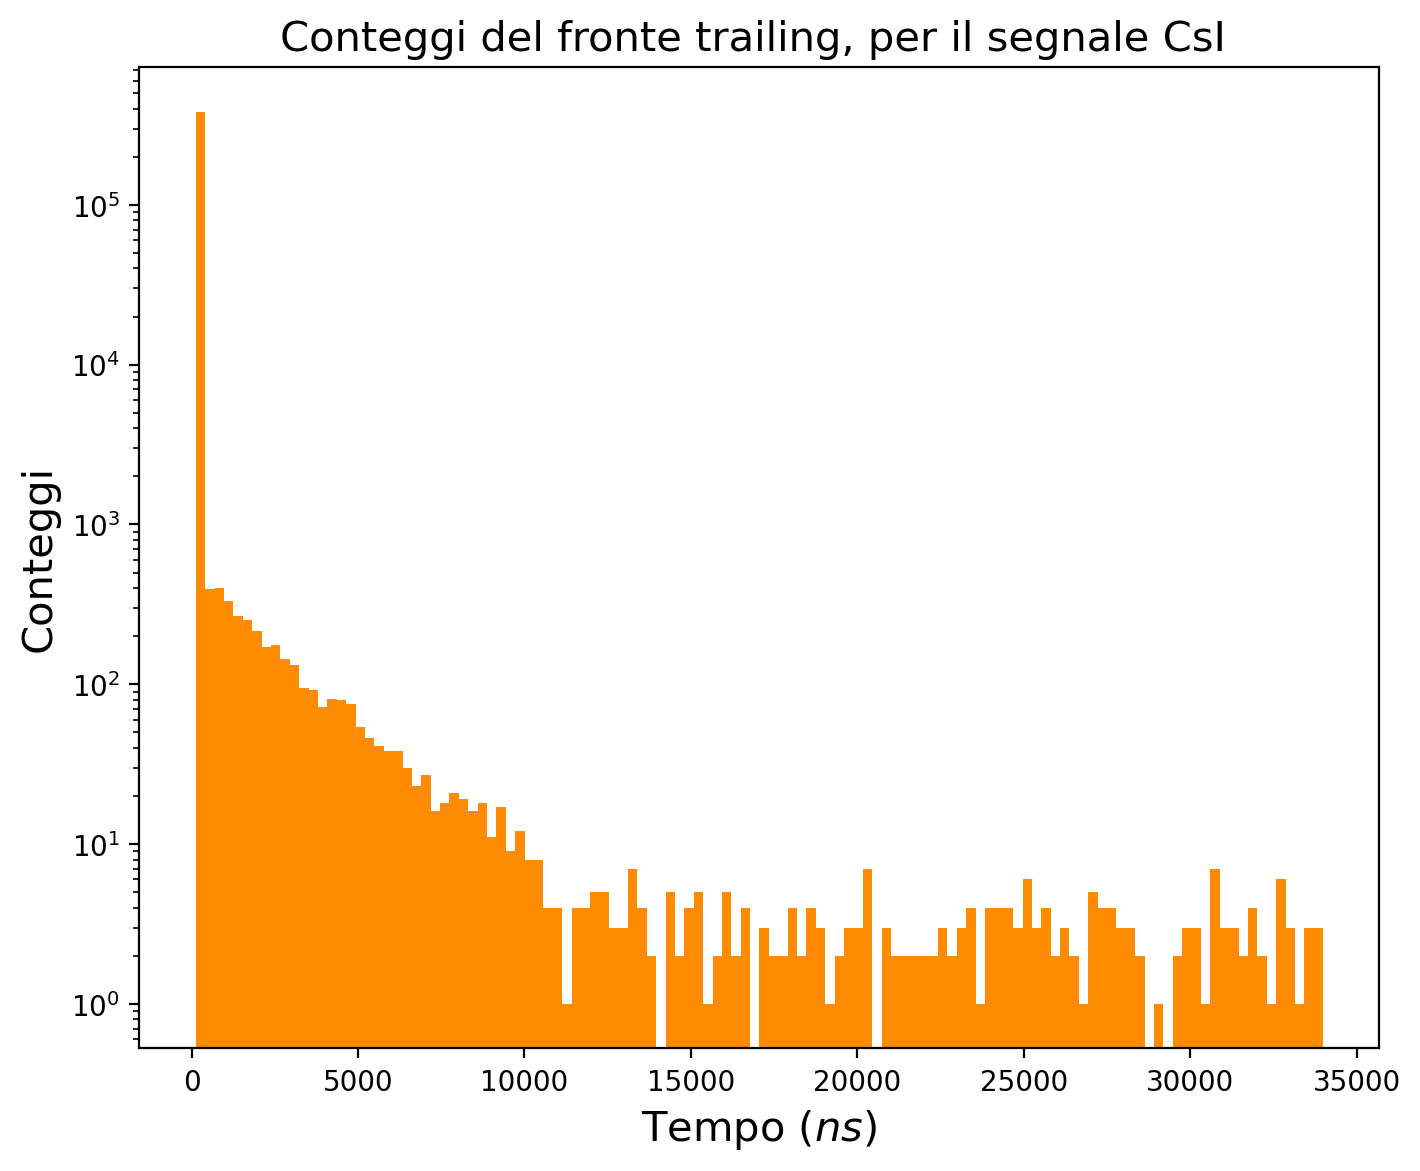

In [58]:
plt.figure(figsize=(8,6.5), dpi = 200)
csi = frontselect([i for i in dict_tot[3]],1)
plt.xlabel("Tempo ($ns$)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.yscale("log")
ycsi,xcsi, ocsi = plt.hist([i[3] for i in csi], bins =120, color = "darkorange")
plt.title("Conteggi del fronte trailing, per il segnale CsI ", fontsize = 15)
p_csi, s_csi = curve_fit(exp, fromhist(xcsi)[1:], ycsi[1:], (30000,2000,10))
#plt.plot(fromhist(xcsi), [exp(i, *p_csi) for i in fromhist(xcsi) ])

In [59]:
sum(ycsi)

387227.0

Adesso seleziono solo i csi sotto i 10, e vediamo quanto rappresentano del totale


0.8732172365914553

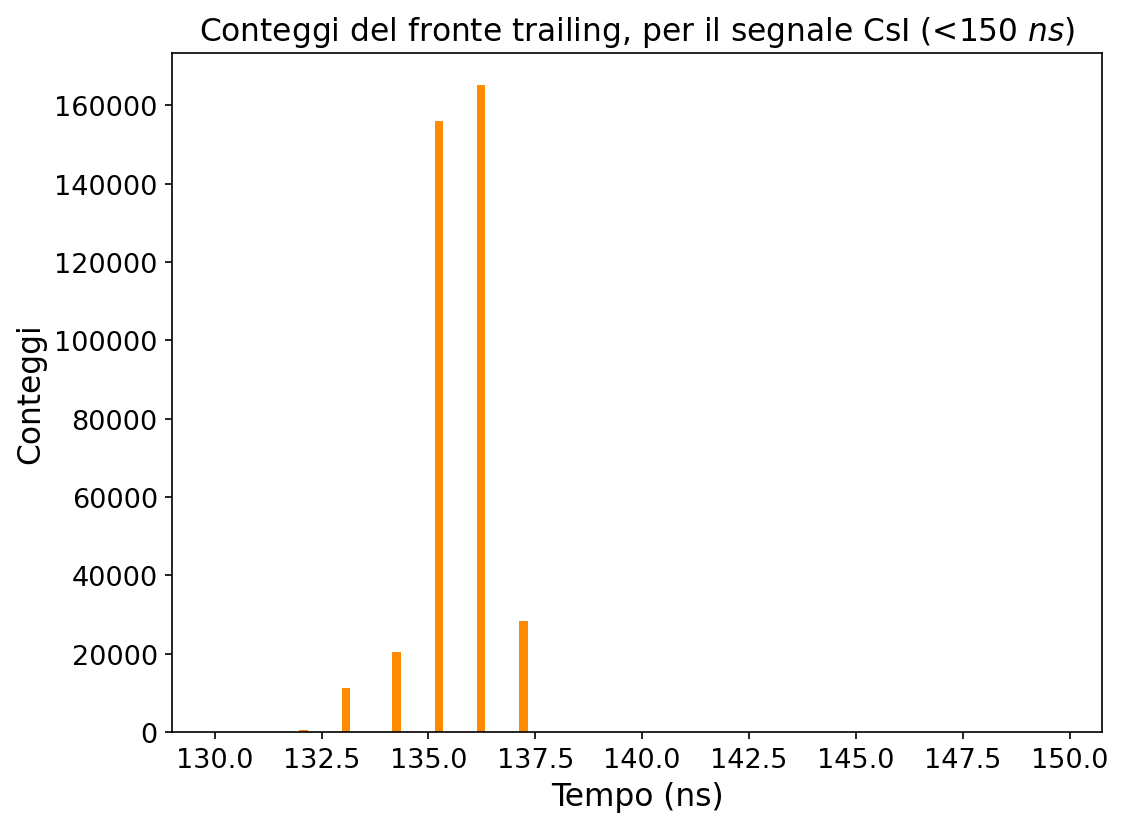

In [43]:
csi_selected = []
lim = 150
for i in csi:
    if i[3]<lim:
        csi_selected.append(i[3])
plt.figure(figsize=(8,6), dpi = 150)
csisy, csix, otcsh= plt.hist(csi_selected, color = "darkorange", bins = 100)
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Conteggi del fronte trailing, per il segnale CsI (<"+str(lim)+" $ns$)", fontsize = 15)

np.std(csi_selected)

In [44]:
sum(csisy)/sum(ycsi)

0.9859462279231562

Insomma il 99% degli eventi è sotto i 10. 

## Down scint

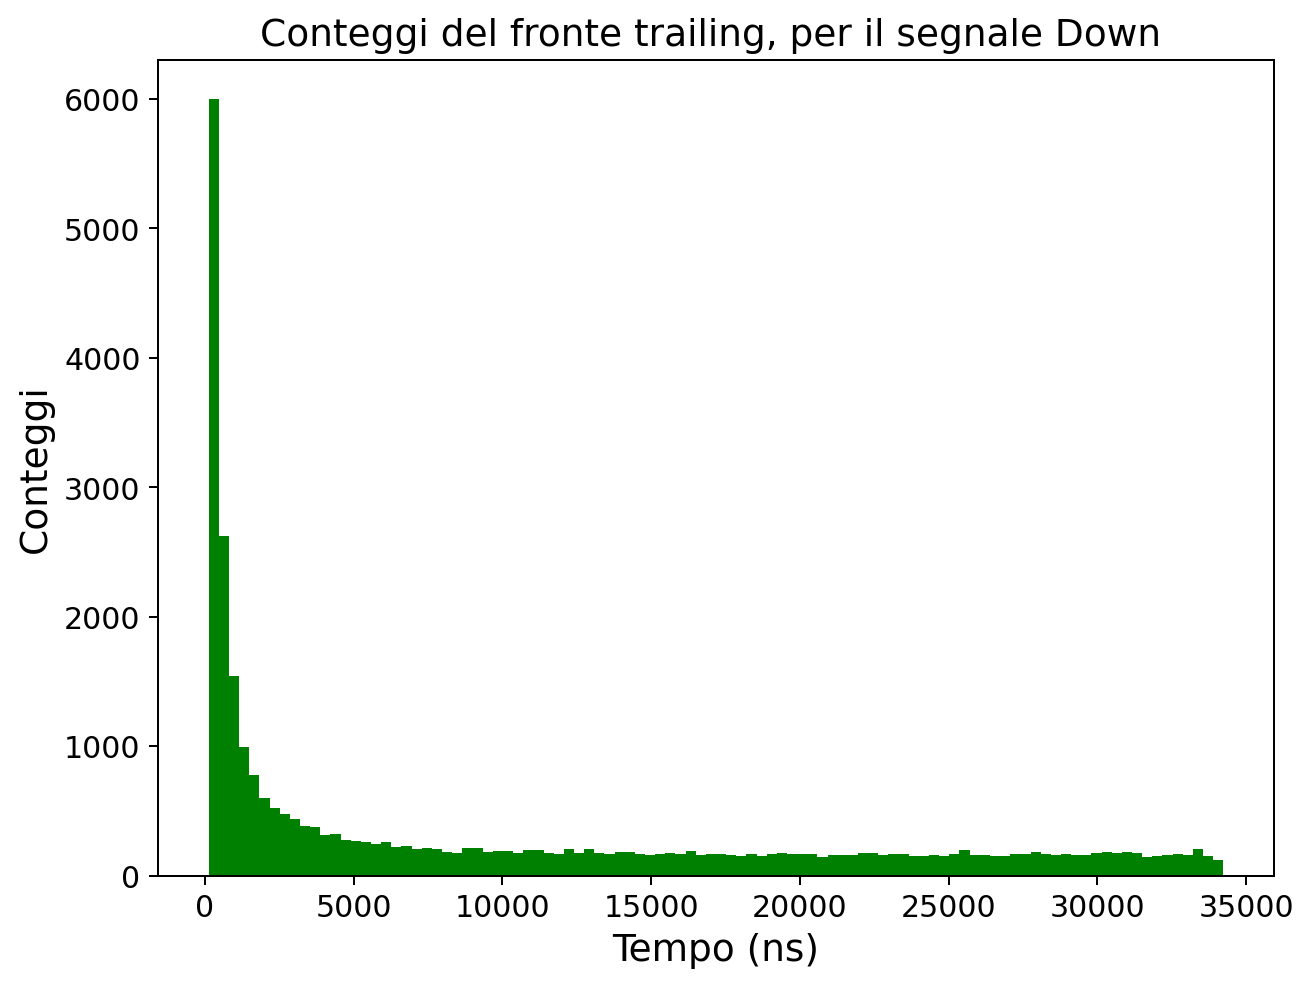

In [56]:
plt.figure(figsize=(8,6), dpi = 180)
downs= frontselect([i for i in dict_tot[4]],0)

ydw,xdw, odw = plt.hist([i[3] for i in downs], bins =100, color = "green")
plt.title("Conteggi del fronte trailing, per il segnale Down ", fontsize = 15)

#plt.yscale("log")
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

Text(0.5, 1.0, 'Conteggi del fronte trailing, per il segnale Down (<10000 $ns$)')

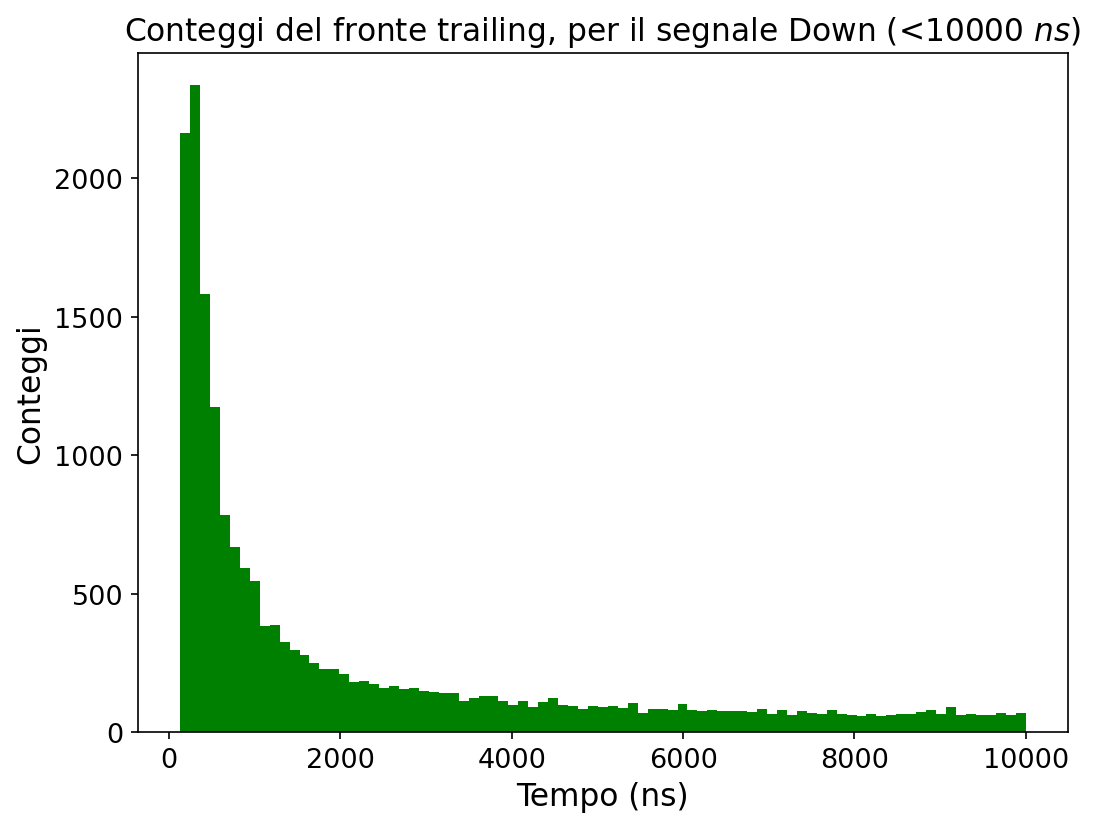

In [57]:
dw_selected = []
lim = 10000
for i in downs:
    if i[3]<lim:
        dw_selected.append(i[3])
plt.figure(figsize=(8,6), dpi = 150)
dwsy, dwsx, otcsh= plt.hist(dw_selected, color = "green", bins = 85)
plt.xlabel("Tempo (ns)", fontsize = 15)
plt.ylabel("Conteggi", fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Conteggi del fronte trailing, per il segnale Down (<"+str(lim)+" $ns$)", fontsize = 15)


In [52]:
sum(dwsy)/sum(ydw)

0.652055857253685

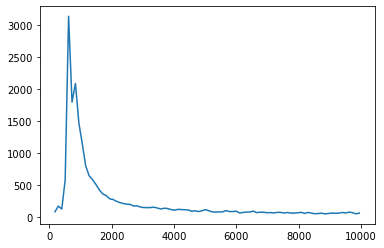

In [67]:
plt.plot(fromhist(dwsx),dwsy)

In [21]:
sum(dwsy)/sum(ydw)

0.652055857253685

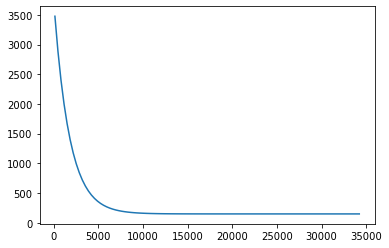

In [23]:
##### ydw,xdw, odw = plt.hist([i[3] for i in dict_tot[4]], bins =80)
paramsd, covd = curve_fit(f = exp,xdata = xdw[0:(len(xdw)-1)],ydata = ydw, p0 = (70,2000,0))
modeld = [exp(i, *paramsd) for i in xdw]
plt.plot(xdw, modeld)

In [24]:
paramsd

array([3586.9350041 , 1740.76593371,  147.91183466])

## Analisi delle coincidenze

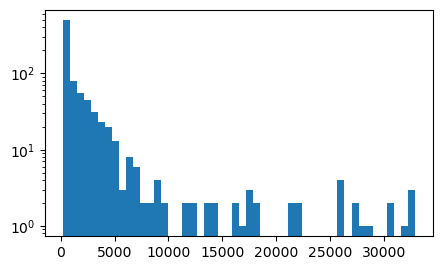

In [25]:

plt.figure(figsize=(5,3), dpi = 100)
coinc_100 = []
for i in dict_tot[6]:
    if i[2]==0:
       coinc_100.append 
plt.yscale("log")
y6,x6, o6 = plt.hist([i[3] for i in dict_tot[6]], bins = 50)
params6, cov6 = curve_fit(f = exp,xdata = x6[0:(len(x6)-1)],ydata = y6, p0 = (70,2000,0))


In [26]:
y6

array([497.,  80.,  55.,  44.,  31.,  23.,  20.,  13.,   3.,   8.,   6.,
         2.,   2.,   4.,   2.,   0.,   0.,   2.,   2.,   0.,   2.,   2.,
         0.,   0.,   2.,   1.,   3.,   2.,   0.,   0.,   0.,   0.,   2.,
         2.,   0.,   0.,   0.,   0.,   0.,   4.,   0.,   2.,   1.,   1.,
         0.,   0.,   2.,   0.,   1.,   3.])

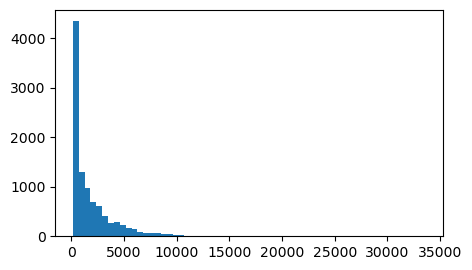

In [27]:
plt.figure(figsize=(5,3), dpi = 100)
ys, xs , other= plt.hist([i[3] for i in dict_tot[8]], bins = 60)
params, cov = curve_fit(f = exp,xdata = xs[0:(len(xs)-1)],ydata = ys, p0 = (70,2000,0))
model = [exp(i, *params) for i in xs]

### 01X


In [28]:
canale_8 =[]
for i in dict_tot[8]:
    if i[2] ==0:
        canale_8.append(i[3])

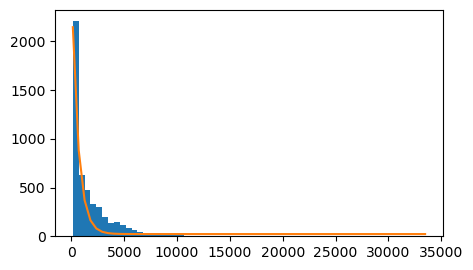

In [29]:
plt.figure(figsize=(5,3), dpi = 100)
ys, xs , other= plt.hist(canale_8, bins = 60)
params, cov = curve_fit(f = exp,xdata = xs[0:60],ydata = ys, p0 = (70,2000,0))
model = [exp(i, *params) for i in xs]

plt.plot(xs,model)

In [30]:
params

array([2625.04309563,  614.85968443,   22.81664913])

In [31]:
cov

array([[ 9689.46638688, -2560.54788709,   -14.35930272],
       [-2560.54788709,  1610.0343041 ,   -70.91973503],
       [  -14.35930272,   -70.91973503,    76.2502981 ]])

In [32]:
coinc_01x =frontselect(dict_tot[8])
dw_s = frontselect(dict_tot[4])
nevents_down = [i[0] for i in dw_s]
coinc_010 =[]
coinc_011 = []
for i in coinc_01x:
    if i[0] in nevents_down:
        print(i[0])
        coinc_011.append(i)
    else:
        coinc_010.append(i)

665
800
1978
2342
2947
2979
4683
6842
6990
9010
10837
10954
11191
11570
14559
18897
18952
19477
20643
21236
22705
23254
24370
24553
26020
26163
26906
28201
28219
30627
31022
31652
31723
31727
32626
32710
33035
33798
33975
34102
34267
34625
35675
37287
37596
39447
40274
43256
44168
44773
46232
48518
49466
50849
51207
52983
53140
53695
54325
55988
56149
58497
396
1909
3729
4614
4693
5092
5698
5903
6180
7489
7884
9111
9540
9875
10439
11044
12396
12476
12630
14060
14612
14758
16195
16238
16454
16672
17973
18012
18073
18300
18447
18526
20121
20457
20839
20932
21942
22765
24388
25432
26459
26740
26866
26899
27291
29226
29538
30000
30114
30600
32085
32418
32434
35749
36111
37840
37854
38633
40527
43370
44402
45782
46273
46862
48693
50000
50172
50542
51456
51720
52041
52962
55387
56257
57169
57655
57922
58841
62724
62905
63307
65262
65302
67703
68013
74556
75218
77650
86352
86774
87931
88590
89184
90635
93517
95562
98606
99299
99998
101042
101356
101817
102935
103657
103917
109942
110575
11141

In [33]:
dw_s 

[[25, 4, 0, 15557.619999999999],
 [37, 4, 0, 395.455],
 [52, 4, 0, 338.2],
 [83, 4, 0, 596.3679999999999],
 [84, 4, 0, 28205.769999999997],
 [98, 4, 0, 567.22],
 [130, 4, 0, 556.81],
 [145, 4, 0, 17780.155],
 [168, 4, 0, 28455.609999999997],
 [192, 4, 0, 898.2579999999999],
 [192, 4, 0, 1961.119],
 [203, 4, 0, 843.0849999999999],
 [215, 4, 0, 10231.864],
 [223, 4, 0, 359.02],
 [228, 4, 0, 199.747],
 [241, 4, 0, 32878.818999999996],
 [247, 4, 0, 16990.036],
 [313, 4, 0, 414.193],
 [320, 4, 0, 5937.739],
 [332, 4, 0, 1863.2649999999999],
 [334, 4, 0, 14562.423999999999],
 [352, 4, 0, 15125.605],
 [380, 4, 0, 1413.5529999999999],
 [395, 4, 0, 25562.671],
 [396, 4, 0, 736.9029999999999],
 [409, 4, 0, 666.115],
 [451, 4, 0, 19106.389],
 [452, 4, 0, 3474.7329999999997],
 [478, 4, 0, 19036.642],
 [485, 4, 0, 3973.372],
 [500, 4, 0, 5001.879999999999],
 [535, 4, 0, 29729.793999999998],
 [539, 4, 0, 2133.925],
 [562, 4, 0, 7199.431],
 [577, 4, 0, 292.39599999999996],
 [593, 4, 0, 30280.48299999

(array([305.,  54.,  13.,   7.,   1.,   0.,   1.,   2.,   1.,   2.]),
 array([  174.763 ,  3302.7598,  6430.7566,  9558.7534, 12686.7502,
        15814.747 , 18942.7438, 22070.7406, 25198.7374, 28326.7342,
        31454.731 ]),
 <BarContainer object of 10 artists>)

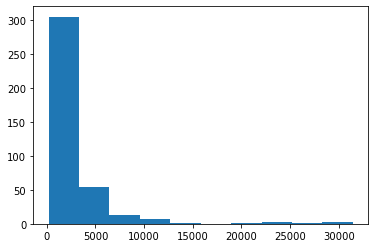

In [34]:
plt.hist([i[3] for  i in coinc_011])